In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Ts = 501
segments = 12
beads = 13

In [3]:
f = []

for i in range(Ts):
    f_ = pd.read_csv('data5/Filament_5s133R0.8Ts'+str(i)+'.csv', names=['x','y','z'], skiprows=1)
    f.append(f_)

In [4]:
for i in range(Ts):
    if len(f[i]) != 13:
        print(i)
    #print('Checked %s'%i)

In [5]:
f[500]['z'][12] # Ts 500 bead 12

0.0

In [6]:
bead = [[] for _ in range(beads)] # 13 data buckets 

In [7]:
for i in range(Ts):
    for j in range(beads):
        bead[j].append(f[i]['z'][j])

In [8]:
bmn = [[] for _ in range(beads)]
bstd = [[] for _ in range(beads)]

In [9]:
for k in range(beads):
    bmn[k] = np.mean(bead[k])
    bstd[k] = np.std(bead[k])

In [10]:
bds = np.arange(1,14,1)

In [11]:
# Run this cell only once. Or restart notebook and run again

bmn08 = pd.DataFrame({'bmn':bmn})
bstd08 = pd.DataFrame({'bstd':bstd})
bds = pd.DataFrame({'bds':bds})
#bstd05 = pd.DataFrame(bstd,columns=['bstd'])

Zr08 = pd.concat([bds,bmn08,bstd08], axis=1)
Zr08.to_csv('figZmvt/R08beadZmvt.csv', index=False, float_format='%.5f')

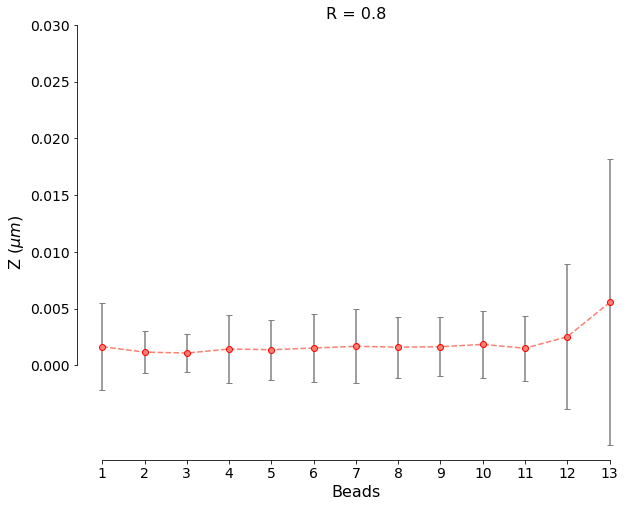

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(bds,bmn,bstd, marker='o', color='salmon', linestyle='--', ecolor='gray', mec='red', capsize=3)
ax.set_aspect('auto')
ax.set_xticks(np.arange(1,14,1))
ax.set_yticks(np.arange(0,0.031,0.005))
ax.spines['left'].set_bounds(0,0.03)
ax.spines['bottom'].set_bounds(1,13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Beads', fontsize=16)
ax.set_ylabel('Z ($\mu m$)', fontsize=16)
ax.tick_params(labelsize=14)
ax.set_title('R = 0.8', fontsize=16)

#plt.savefig('figZmvt/R08beadZmvt.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('figZmvt/R08beadZmvt.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()